In [4]:
import tensorflow as tf
import tensorflow.keras.datasets as ds

In [5]:
print(tf.__version__)

2.15.0


In [6]:
a = tf.random.uniform([2,3],0.1)
a

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.88260335, 0.1423862 , 0.8830515 ],
       [0.9555998 , 0.15901332, 0.8294662 ]], dtype=float32)>

In [7]:
type(a)

tensorflow.python.framework.ops.EagerTensor

In [9]:
(xtrain,ytrain),(xtest,ytest) = ds.mnist.load_data()

In [17]:
import tensorflow as tf

x = tf.constant([[0.0, 0.0],
                 [0.0, 0.1],
                 [1.0, 0.0],
                 [1.0, 1.0]])

y = tf.constant([[-1],
                 [1],
                 [1],
                 [1]])

w = tf.Variable([[1.0],
                 [1.0]])

b = tf.Variable(-0.5)

s = tf.add(tf.matmul(x, w), b)
o = tf.sign(s)

# Print the result
print(o)


tf.Tensor(
[[-1.]
 [-1.]
 [ 1.]
 [ 1.]], shape=(4, 1), dtype=float32)


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

x = [[0.0, 0.0],
     [0.0, 0.1],
     [1.0, 0.0],
     [1.0, 1.0]]

y = [[-1],
     [1],
     [1],
     [1]]

ninput = 2
noutput = 1

perception = Sequential()
perception.add(Dense(units=noutput, activation='tanh', input_shape=(ninput,), kernel_initializer='random_uniform', bias_initializer='zeros'))  # Fixed the typo here

perception.compile(loss='mse', optimizer=SGD(learning_rate=0.1), metrics=['mse'])  # Fixed the 'epoch' parameter to 'epochs'

perception.fit(x, y, epochs=500, verbose=2)  # Fixed the parameter name to 'epochs'

res = perception.predict(x)
print(res)


Epoch 1/500
1/1 - 0s - loss: 0.9949 - mse: 0.9949 - 152ms/epoch - 152ms/step
Epoch 2/500
1/1 - 0s - loss: 0.8023 - mse: 0.8023 - 2ms/epoch - 2ms/step
Epoch 3/500
1/1 - 0s - loss: 0.7106 - mse: 0.7106 - 3ms/epoch - 3ms/step
Epoch 4/500
1/1 - 0s - loss: 0.6650 - mse: 0.6650 - 2ms/epoch - 2ms/step
Epoch 5/500
1/1 - 0s - loss: 0.6391 - mse: 0.6391 - 2ms/epoch - 2ms/step
Epoch 6/500
1/1 - 0s - loss: 0.6224 - mse: 0.6224 - 2ms/epoch - 2ms/step
Epoch 7/500
1/1 - 0s - loss: 0.6106 - mse: 0.6106 - 4ms/epoch - 4ms/step
Epoch 8/500
1/1 - 0s - loss: 0.6015 - mse: 0.6015 - 2ms/epoch - 2ms/step
Epoch 9/500
1/1 - 0s - loss: 0.5941 - mse: 0.5941 - 2ms/epoch - 2ms/step
Epoch 10/500
1/1 - 0s - loss: 0.5877 - mse: 0.5877 - 2ms/epoch - 2ms/step
Epoch 11/500
1/1 - 0s - loss: 0.5821 - mse: 0.5821 - 3ms/epoch - 3ms/step
Epoch 12/500
1/1 - 0s - loss: 0.5770 - mse: 0.5770 - 3ms/epoch - 3ms/step
Epoch 13/500
1/1 - 0s - loss: 0.5723 - mse: 0.5723 - 2ms/epoch - 2ms/step
Epoch 14/500
1/1 - 0s - loss: 0.5680 - mse:

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import  mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [31]:
(xtrian,ytrain) , (xtest,ytest) = mnist.load_data()

In [32]:
xtrain = xtrain.reshape(60000,784)
xtest = xtest.reshape(10000,784)
xtrain = xtrain.astype(np.float32)/255.0
xteset = xtest.astype(np.float32)/255.0

In [33]:
ytrain = tf.keras.utils.to_categorical(ytrain,10)
ytest = tf.keras.utils.to_categorical(ytest,10)

In [42]:
ninput = 784
nhidden = 1024
noutput = 10

mlp = Sequential()

mlp.add(Dense(units=nhidden, activation='tanh', input_shape=(ninput,),
              kernel_initializer='random_uniform', bias_initializer='zeros'))

# Add a hidden layer
mlp.add(Dense(units=noutput, activation='tanh',
              kernel_initializer='random_uniform', bias_initializer='zeros'))


mlp.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


hist = mlp.fit(xtrain, ytrain, batch_size=128, epochs=30, verbose=2, validation_data=(xtest, ytest))


# Evaluate the model
res=mlp.evaluate(xtest, ytest, verbose=0)

Epoch 1/30
469/469 - 3s - loss: 0.0902 - accuracy: 0.1035 - val_loss: 0.6941 - val_accuracy: 0.6738 - 3s/epoch - 6ms/step
Epoch 2/30
469/469 - 2s - loss: 0.0900 - accuracy: 0.1076 - val_loss: 0.7177 - val_accuracy: 0.6235 - 2s/epoch - 5ms/step
Epoch 3/30
469/469 - 2s - loss: 0.0900 - accuracy: 0.1082 - val_loss: 0.9247 - val_accuracy: 0.5350 - 2s/epoch - 5ms/step
Epoch 4/30
469/469 - 2s - loss: 0.0900 - accuracy: 0.1069 - val_loss: 1.0796 - val_accuracy: 0.3473 - 2s/epoch - 5ms/step
Epoch 5/30
469/469 - 2s - loss: 0.0900 - accuracy: 0.1106 - val_loss: 1.1659 - val_accuracy: 0.3319 - 2s/epoch - 5ms/step
Epoch 6/30
469/469 - 2s - loss: 0.0900 - accuracy: 0.1110 - val_loss: 1.1486 - val_accuracy: 0.2606 - 2s/epoch - 5ms/step
Epoch 7/30
469/469 - 2s - loss: 0.0900 - accuracy: 0.1103 - val_loss: 1.2107 - val_accuracy: 0.2886 - 2s/epoch - 5ms/step
Epoch 8/30
469/469 - 2s - loss: 0.0900 - accuracy: 0.1143 - val_loss: 1.1805 - val_accuracy: 0.2113 - 2s/epoch - 5ms/step
Epoch 9/30
469/469 - 2s 

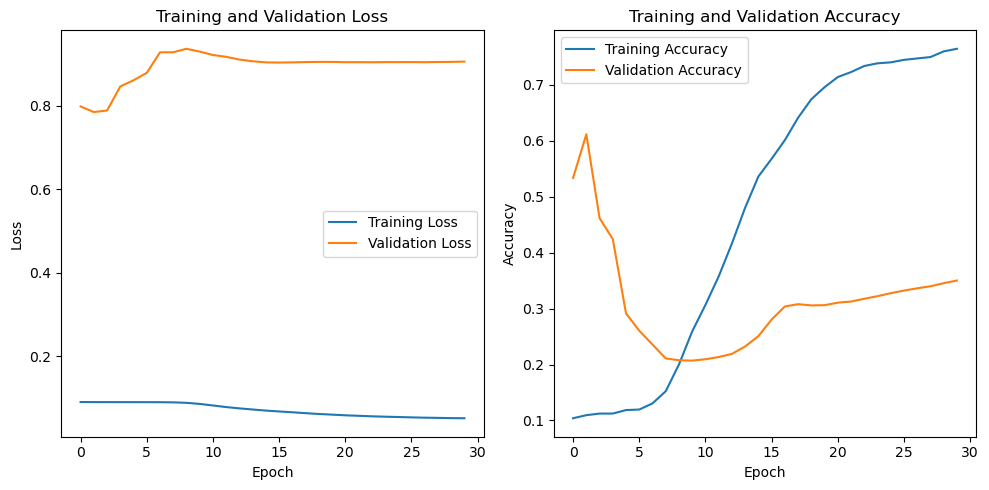

In [38]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Visualize the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

# Fation

In [10]:
from tensorflow.keras.datasets import fashion_mnist

(xtrain, ytrain), (xtest, ytest) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 9s 2us/step


In [11]:
xtrain = xtrain.reshape(60000,784)
xtest = xtest.reshape(10000,784)
xtrain = xtrain.astype(np.float32)/255.0
xteset = xtest.astype(np.float32)/255.0

In [12]:
ytrain = tf.keras.utils.to_categorical(ytrain,10)
ytest = tf.keras.utils.to_categorical(ytest,10)

In [16]:
ninput = 784
nhidden = 512
noutput = 10

mlp = Sequential()

mlp.add(Dense(units=nhidden, activation='tanh', input_shape=(ninput,),
              kernel_initializer='random_uniform', bias_initializer='zeros'))

mlp.add(Dense(units=nhidden, activation='tanh',kernel_initializer='random_uniform', bias_initializer='zeros'))

mlp.add(Dense(units=nhidden, activation='tanh',kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(units=nhidden, activation='tanh',kernel_initializer='random_uniform', bias_initializer='zeros'))



mlp.add(Dense(units=noutput, activation='tanh',
              kernel_initializer='random_uniform', bias_initializer='zeros'))


mlp.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


hist = mlp.fit(xtrain, ytrain, batch_size=128, epochs=5, verbose=2, validation_data=(xtest, ytest))


# Evaluate the model
res=mlp.evaluate(xtest, ytest, verbose=0)

Epoch 1/5
469/469 - 4s - loss: 0.0373 - accuracy: 0.8019 - val_loss: 0.0531 - val_accuracy: 0.7630 - 4s/epoch - 8ms/step
Epoch 2/5
469/469 - 3s - loss: 0.0252 - accuracy: 0.8513 - val_loss: 0.0420 - val_accuracy: 0.7897 - 3s/epoch - 7ms/step
Epoch 3/5
469/469 - 3s - loss: 0.0221 - accuracy: 0.8645 - val_loss: 0.0358 - val_accuracy: 0.8016 - 3s/epoch - 7ms/step
Epoch 4/5
469/469 - 4s - loss: 0.0203 - accuracy: 0.8728 - val_loss: 0.0321 - val_accuracy: 0.8245 - 4s/epoch - 8ms/step
Epoch 5/5
469/469 - 4s - loss: 0.0192 - accuracy: 0.8785 - val_loss: 0.0360 - val_accuracy: 0.7981 - 4s/epoch - 7ms/step


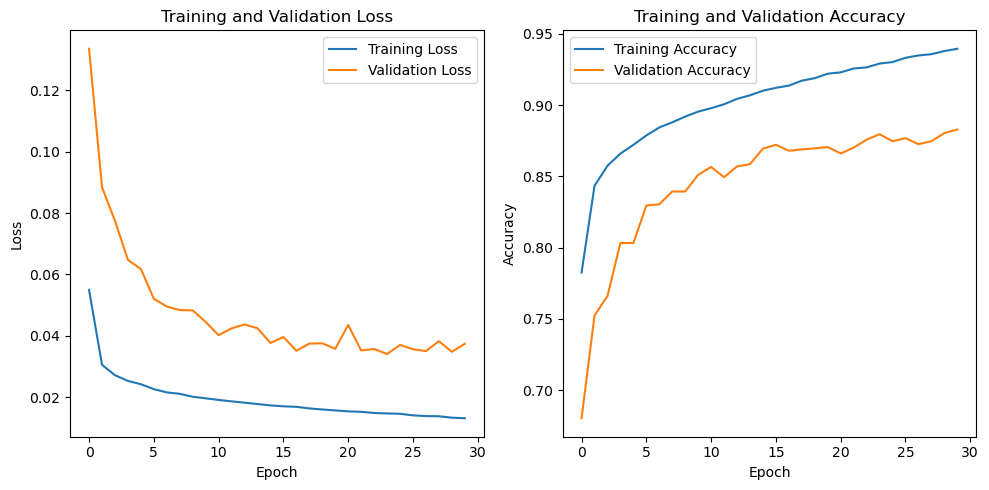

In [14]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Visualize the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()